This part interpolates the amplification factor for the SIS lens using the data obtained from the MATHEMATICA file. 

In [92]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

In [93]:
def cleanData(filePath = '/Users/saifali/Desktop/gwlensing/data/', 
              fileName = None):
    
    with open(filePath + fileName) as f:
        read = f.readlines()
    results_temp = [float(s) for s in read[0][1:-1].split(',')]
    results = [i for n, i in enumerate(results_temp) if i not in results_temp[:n]]
    
    return np.array(results)

freq = cleanData(fileName = 'freq_interpolate_y_0.3.txt')
Fsis_abs = cleanData(fileName = 'abs_ampfact_interpolate_y_0.3.txt')

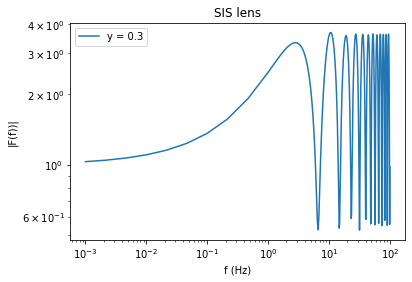

In [94]:
plt.loglog(freq, Fsis_abs, label = "y = 0.3")
plt.title("SIS lens")
plt.xlabel('f (Hz)')
plt.ylabel('|F(f))|')
plt.legend()

In [106]:
def F_interp(freq, Fsis, freq_cut_val = 2, seed = None, random_size = 20):
    
    np.random.seed(seed)
    #[freq_cut_val] = Hz
    
    freq_cut = freq[freq < freq_cut_val]
    Fsis_cut = Fsis[:len(freq_cut)]
    
    #freq_cut = freq
    #Fsis_cut = Fsis
    
    if Fsis[0] > 0:
        plt.loglog(freq_cut, Fsis_cut)
    else:
        plt.plot(freq_cut, Fsis_cut)
    
    freq_interp = np.random.uniform(low = freq_cut[0], high = freq_cut[-1], size = random_size)
    Fsis_interp = np.zeros_like(freq_interp)

    for i in range(random_size):
        Fsis_interp_temp = interp1d(freq_cut, Fsis_cut)
        Fsis_interp[i] = Fsis_interp_temp(freq_interp[i])
    
    if Fsis[0] > 0:
        plt.loglog(freq_interp, Fsis_interp, '.', label = 'interpolated')
    else:
        plt.semilogx(freq_interp, Fsis_interp, '.', label = 'interpolated')
    plt.legend()
    
    return freq_interp, Fsis_interp

Text(0, 0.5, '|F(f)|')

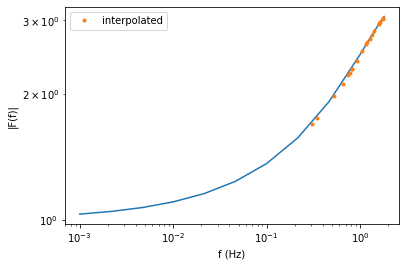

In [107]:
# absolute value of amplification factor
F_interp(freq = freq, Fsis = Fsis_abs)
plt.xlabel('f (Hz)')
plt.ylabel('|F(f)|')

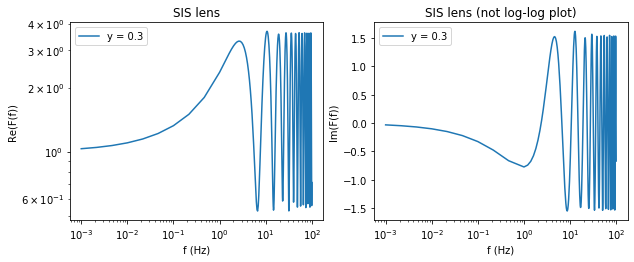

In [108]:
freq = cleanData(fileName = 'freq_interpolate_y_0.3.txt')
Fsis_real = cleanData(fileName = 're_ampfact_interpolate_y_0.3.txt')
Fsis_im = cleanData(fileName = 'im_ampfact_interpolate_y_0.3.txt')

plt.figure(figsize = (10, 8))
plt.subplot(2, 2, 1)
plt.loglog(freq, Fsis_real, label = "y = 0.3")
plt.title("SIS lens")
plt.xlabel('f (Hz)')
plt.ylabel('Re(F(f))')
plt.legend()

plt.subplot(2, 2, 2)
plt.semilogx(freq, Fsis_im, label = "y = 0.3")
plt.title("SIS lens (not log-log plot)")
plt.xlabel('f (Hz)')
plt.ylabel('Im(F(f))')
plt.legend()

Text(0, 0.5, 'Im(F(f))')

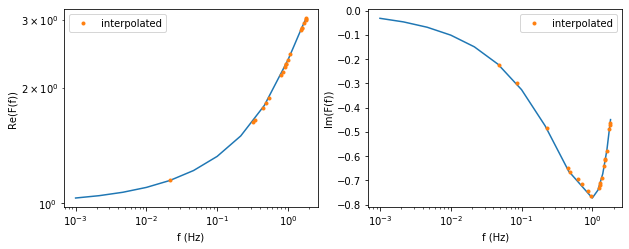

In [109]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
F_interp(freq, Fsis_real)
plt.xlabel('f (Hz)')
plt.ylabel('Re(F(f))')
plt.subplot(2, 2, 2)
F_interp(freq, Fsis_im)
plt.xlabel('f (Hz)')
plt.ylabel('Im(F(f))')